# ICPE 689 Data Science Fundamental for Energy II

Some of the examples and exercises of this course are based on two popular books on data science with Python, [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
and [the Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/).

<span><img src="images/HandsonML.jpg" width="200" /><img src="images/PDSH-cover.png" width="200" /></span>

In [1]:
# pydot is required to plot dot files. !pip install could be used to install other required modules.
!pip install pydot

# Clasification Methods

Classification tries to identify the category of a new observation by training with data with known categories. Some common classification algorithms are

* K-Nearest Neighbors
* Decision Tree Classifiers/Random Forests
* [Naive Bayes](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb)
* Support Vector Machines
* Linear Discriminant Analysis
* Logistic Regression


[<img src="images/colab-badge.png" width="200"/>](https://colab.research.google.com/github/jtao/AdvancedML/blob/main/Classification_methods.ipynb)

## Classes of Classification

In classification, the goal is to predict a class label, which is a choice from a predefined list of possibilities. 
Classification is sometimes separated into **binary classification**, which is the special case of distinguishing between exactly two classes, and **multiclass classification**, which is classification between more than two classes. You can think of binary classification as trying to answer a yes/no question. Example are given below, 

- Binary Classification:  Classifying emails as either spam or not spam.
- Multiclass Classification: Predicting what language a website is in from the text on the website. The classes here would be a pre-defined list of possible languages.

## K Nearest Neighbor (KNN) Algorithm

The k-Nearest Neighbors (KNN) algorithm is a very popular classification method. The method follows the compactness hypothesis: if the distance between the examples is measured well enough, then similar examples are much more likely to belong to the same class.
* Simple implementation
* Easy interpretability
* Well studied

<center><img src="images/KNN.png" width="300" /></center>

### Theoretical background of KNN

* KNN stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). 

* `Algorithm`: A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor.

  1. Given a positive integer K and a test observation $x_0$, the KNN classifier first identifies the K points in the training data that are closest to $x_0$, represented by $\mathcal{N_0}$. 
  2. It then estimates the conditional probability for class $j$ as the fraction of points in $\mathcal{N_0}$ whose response values equal $j$: 
$$
P(Y = j|X = x_0) = \frac{1}{K}\sum_{i\in \mathcal{N_0}}I(y_i = j)
$$
  3. Finally, KNN classifies the test observation $x_0$ with the largest probability. 

* How to select the number of neighbors $k$: cross-validation.


### A naive example

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
# simulated data in two-dimensional space
X = [[0,1], [1,1], [2,1], [3,2]]
y = [0, 0, 1, 1] #label
neigh = neighbors.KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

print(neigh.predict([[1.1,1.2]]))
print(neigh.predict_proba([[0.9,0.5]]))

[0]
[[0.66666667 0.33333333]]


### An application to Iris data (sklearn original example)

In [4]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

n_neighbors = 15
h = .02  # step size in the mesh

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

weights='uniform'
    
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [5]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# change into flattened arrays
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

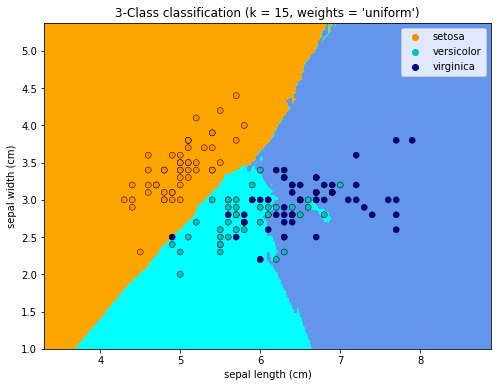

In [6]:
plt.figure(figsize=(8, 6))
# Plot filled contour line
plt.contourf(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

### An application to the UCI ML Hand-written Digits Recognition
We use the `sklearn` built-in dataset on handwritten digits. This task is an example where k-NN works surprisingly well. 

Pictures here are 8x8 matrices (intensity of white color for each pixel). Then each such matrix is ​​"unfolded" into a vector of length 64, and we obtain a feature description of an object.

In [7]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target
X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

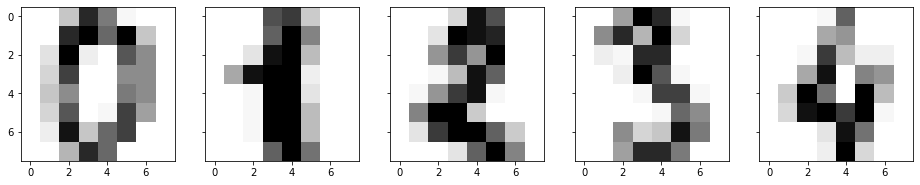

In [8]:
# visualization of the digits data: the 8x8 matrices. Showing first several images.
num_images=5
f, axes = plt.subplots(1, num_images, sharey=True, figsize=(16, 6))
for i in range(num_images):
    axes[i].imshow(X[i, :].reshape([8, 8]), cmap="Greys");

In [9]:
# randomly select 70% of the data as training dataset, 30% as testing dataset.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [10]:
# run the KNNclassifier on the training data, and select k = 10
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

# predict on the testing data, and obtain the prediction accuracy
knn_pred = knn.predict(X_test)
accuracy_score(y_test,knn_pred)
# You can also check manually with
#np.not_equal(y_test, knn_pred)

0.9740740740740741

In [11]:
# function that plots a single image.
def test_digit(i):
    fig = plt.figure()    
    plt.imshow(X_test[i,:].reshape(8,8), interpolation='none')
    plt.title("digit:%d   prediction: %d" %(y_test[i], knn.predict(X_test[i,:].reshape(1,64))))
    plt.xticks([])
    plt.yticks([])

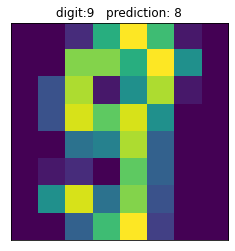

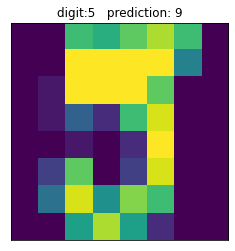

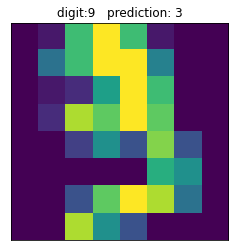

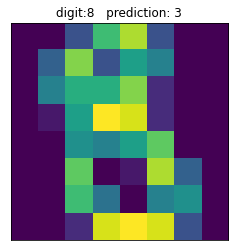

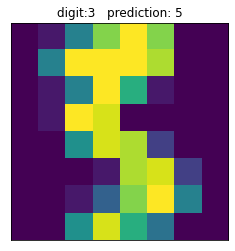

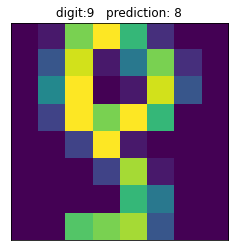

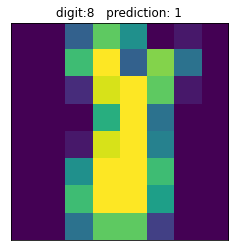

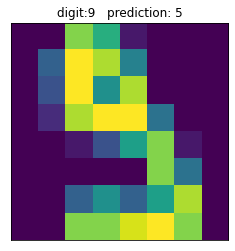

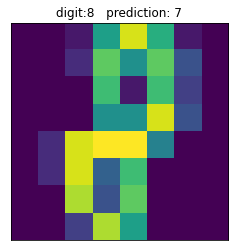

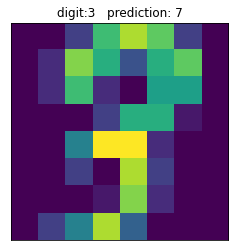

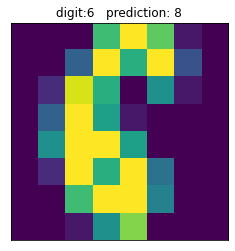

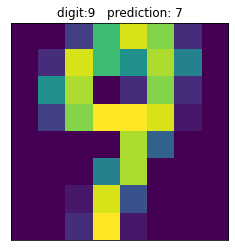

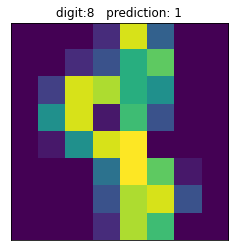

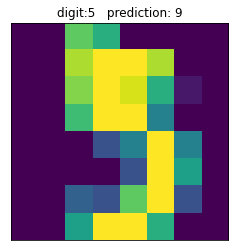

In [12]:
# plot out the ones that KNN failed to predict.
fc_indice = np.argwhere(np.not_equal(y_test, knn_pred))
for i in fc_indice:
    test_digit(i)

### Assignment: An Application to Running Data
`target`: draw the plot to show the decision boundary of knn method.

`Backgroud`: Running data set contains the records of whehter a machine can run under different weather conditions. There are three columns in the data set: `Temp`: Temperature, `Wind`: Wind speed, `Fun`: Indicator of whether the machine runs normally. 

In [13]:
import warnings
warnings.filterwarnings('ignore')
# Load data
data = pd.read_csv('https://raw.githubusercontent.com/jtao/AdvancedML/main/data/Running.csv', header = 0)
train = np.column_stack([data.Temp, data.Wind])
data.head()

,Temp,Wind,Fun
0,75,1.0,Yes
1,61,10.7,No
2,42,12.3,No
3,72,5.8,Yes
4,38,1.3,No


In [14]:
m = 100
test1 = np.linspace(min(data.Temp.to_numpy()), max(data.Temp.to_numpy()), num = m)
test2 = np.linspace(min(data.Wind.to_numpy()), max(data.Wind.to_numpy()), num = m)
y = data.Fun.to_numpy()
k = 3
yhat = np.zeros((m, m))
fun = neighbors.KNeighborsClassifier(n_neighbors = k)
fun.fit(train, y)

KNeighborsClassifier(n_neighbors=3)

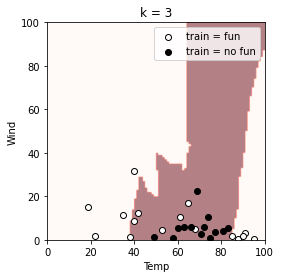

In [15]:
for i in range(m):
    for j in range(m):
        test = np.array([test1[i], test2[j]]).reshape(1, -1)
        res = fun.predict(test)
        if res == 'Yes':
            yhat[i , m - j - 1] = 1
            
plt.imshow(yhat.transpose(),vmin=0,vmax=1,cmap=plt.get_cmap("Reds"),alpha=0.5, extent = [0, 100, 0, 100])
plt.xlabel("Temp")
plt.ylabel("Wind")
plt.title('k = 3')
dot1 = plt.scatter(train[y == "No", 0], train[y == "No", 1], color = "white", edgecolor = "black")
dot2 = plt.scatter(train[y == "Yes", 0], train[y == "Yes", 1], color = "black", edgecolor = "black")
plt.legend("upper left", handles = [dot1, dot2], labels = ["train = fun", "train = no fun"])
plt.show()

## Decision Trees and Random Forests Algorithm
The decision trees are to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

<center><img src="images/Beachdecisiontree.png" width="600" /><br/>(Beach Decision Tree - Wikipedia)</center>

In [16]:
# required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from six import StringIO  
import pydot
from IPython.display import Image
from sklearn.metrics import accuracy_score

In [17]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

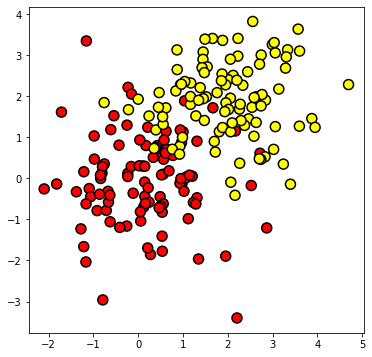

In [18]:
# visualize the two classes
plt.figure(figsize=(6, 6))
plt.scatter(train_data[:, 0], train_data[:, 1], 
            c=train_labels, s=100, cmap="autumn", edgecolors="black", linewidth=1.5)

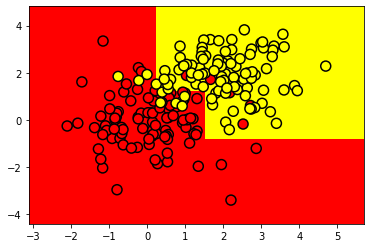

In [19]:
# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

### Theoretical background of decision trees
#### Regression Tree
The process of building a regression tree
  1. divide the predictor space—that is, the set of possible values for $X_1, X_2, \dots , X_p$—into $J$ distinct and non-overlapping regions, $R_1,R_2,\dots,R_j,\dots, R_J$.
  2. For every observation that falls into the region $R_j$ , we make the same prediction, which is simply the mean of the response values for the training observations in $R_j$.

* For step 1, how to construct the regions $R_1,\dots,R_J$? Divide the predictor space into high-dimensional "rectangles", or "boxes", for simplicity and for ease of interpretation of the resulting predictive model. The goal is to find boxes $R_1, \dots , R_J$ that minimize the $RSS$, given by $\sum_{j=1}^J \sum_{i\in R_j}(y_i - \widehat{y}_{R_j})^2$.
  - Recursive binary splitting: successively splits the predictor space; each split is indicated via two new branches further down on the tree.
* For step 2, predict the response for a given test observation using the mean of the training observations in the region to which that test observation belongs.

#### Tree pruning
The process described above may produce good predictions on the training set, but is likely to overfit the data, leading to poor test set performance. This is because the resulting tree might be too complex. A smaller tree with fewer splits (that is, fewer regions $R_1,\dots,R_J$) might lead to lower variance and better interpretation at the cost of a little bias.

The better strategy is to grow a very large tree $T_0$, and then prune it back in order to obtain a subtree.

#### Reduced error pruning
* Starting at the leaves, each node is replaced with its most popular class. 
* If the prediction accuracy is not affected then the change is kept. 

Reduced error pruning has the advantage of simplicity and speed.

### Classification Tree
A classification tree is very similar to a regression tree, except that it is used to predict a qualitative response rather than a quantitative one.

In the classification setting, $RSS$ cannot be used as a criterion for making the binary splits. A natural alternative to $RSS$ is the classification error rate: $E = 1 - \max_k (\widehat{p}_{mk})$, where $\widehat{p}_{mk}$ represents the proportion of training observations in the $m$th region that are from the $k$th class.

In practice, two other measures are preferable
  - Gini index $G = \sum_{k=1}^K \widehat{p}_{mk}(1-\widehat{p}_{mk})$,
  - Entropy $D = -\sum_{k=1}^K \widehat{p}_{mk} \log \widehat{p}_{mk}$.


### An Application to Heart Data
Background
* `Heart` dataset contains a binary outcome `HD` for 303 patients who presented with chest pain. An outcome value of `Yes` indicates the presence of hear disease based on an angiographic test, while `No` means no heart disease. 

* There are 13 predictors including `Age`, `Sex`, `Chol` (a cholesterol measurement), `Thal`( Thallium stress test) and other heart and lung function measurements. 


In [20]:
Heart = pd.read_csv('https://raw.githubusercontent.com/jtao/AdvancedML/main/data/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
Heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [21]:
Heart.ChestPain = pd.factorize(Heart.ChestPain)[0]
Heart.Thal = pd.factorize(Heart.Thal)[0]
X2 = Heart.drop('AHD', axis=1) # explanatory variables
y2 = pd.factorize(Heart.AHD)[0] # response variables AHD

In [22]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X2,y2)

DecisionTreeClassifier(max_features=3, max_leaf_nodes=6)

In [23]:
clf.score(X2,y2) #Return the mean accuracy on the given data and labels.

0.7878787878787878

In [24]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

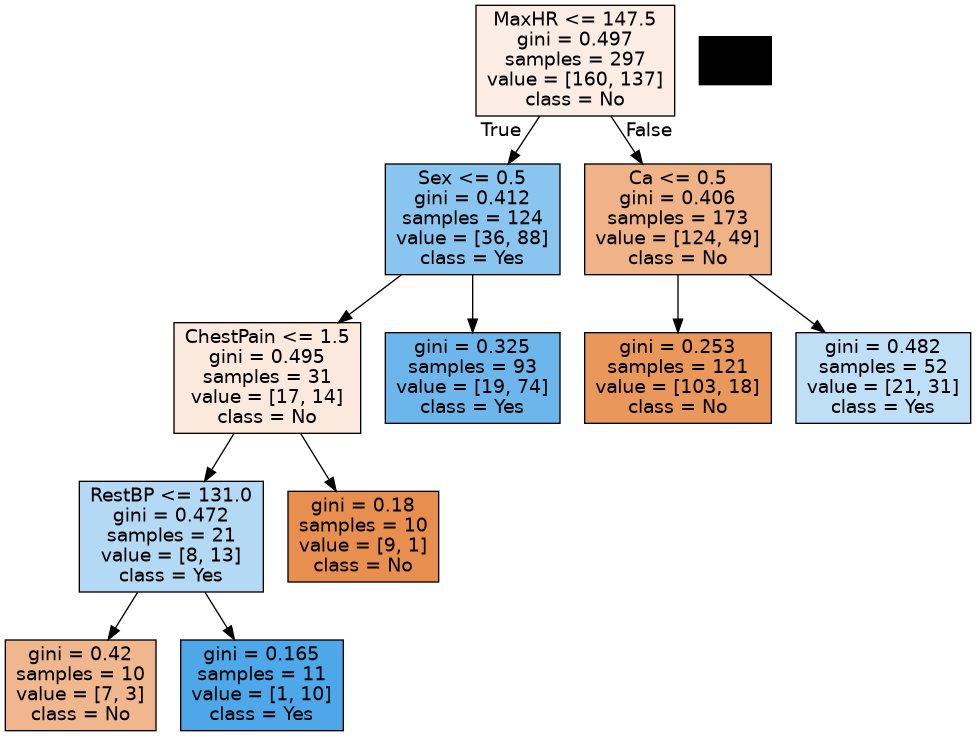

In [25]:
graph2, = print_tree(clf, features=X2.columns, class_names=['No', 'Yes'])
Image(graph2.create_png())

## Random forests
Random forests is a widely used supervised learning method.

* Each time a split in a tree is considered, a random sample of $m$ predictors is chosen as split candidates from the full set of $p$ predictors.
* The split is allowed to use only one of those m predictors.
* A fresh sample of m predictors is taken at each split, and typically we choose $m \approx \sqrt{p}$

<center><img src="images/RandomForest.png" width="400" /><br/>(Credit: analyticsvidhya.com)</center>


### Algorithm:

1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree.
3. Perform a vote for each predicted result.
4. Select the prediction result with the most votes as the final prediction.

### Random Forests vs Decision Trees

* Random forests is a set of multiple decision trees.
* Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.
* Decision trees are computationally faster.
* Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.


## An Application to Iris Data with Decision Trees and Random Forests

In [26]:
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [28]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

clf2 = DecisionTreeClassifier(criterion="entropy",max_depth=3)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)
clf2.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

# the accuracy of random forest prediction
print(accuracy_score(y_test,y_pred))
# the accuracy of decision tree prediction
print(accuracy_score(y_test,y_pred2))

0.9555555555555556
0.9333333333333333


## Support Vector Machines
Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression.
<center><img src="images/SVM_margin.png" width="300" /><br/>(Credit: wikipedia.org)</center>

### Algorithm:
Support Vector Machine (SVM) is supervsied learning classification algorithm. 
* Consider a simple binary classification problem: a linearly separable data in 2-dim. 
* We try to find a boundary that divides the data into two class such that the misclassification  is minimized. 
* Different lines can be used as separators between samples. Depending on the line we choose, a new point marked by 'x' in the plot will be assigned a different label. 

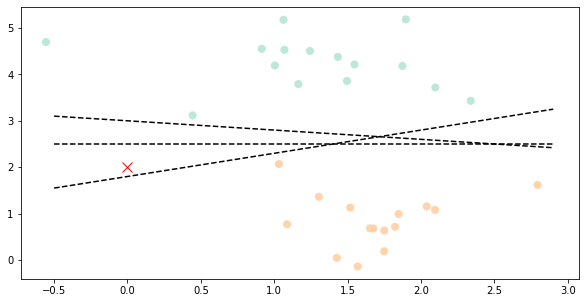

In [29]:
from scipy import stats
import seaborn as sns
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 30, centers = 2, random_state = 0, cluster_std = 0.6)

plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = "icefire")

xfit = np.arange(-0.5, 3.0, 0.1)
for m, b in [(0.0, 2.5), (0.5, 1.8), (-0.2, 3.0)]:
    plt.plot(xfit, m * xfit + b, '--k')
plt.plot([0.0], [2.0], 'x', color = 'red', markersize = 10);

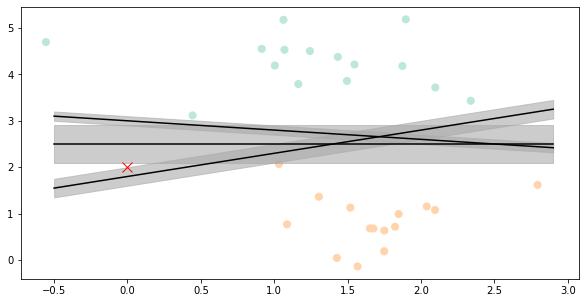

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = "icefire")
xfit = np.arange(-0.5, 3.0, 0.1)
for m, b, d in [(0.0, 2.5, 0.4), (0.5, 1.8, 0.2), (-0.2, 3.0, 0.1)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.6)
plt.plot([0.0], [2.0], 'x', color = 'red', markersize = 10)
plt.show()

To fit a SVM model on this generated dataset. 

In [31]:
# for visualization
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

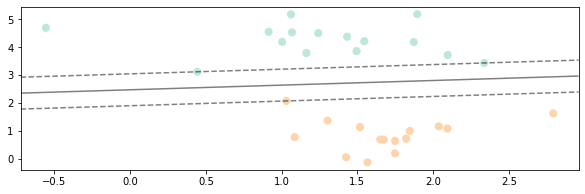

In [32]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

plt.figure(figsize = (10,3))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='icefire')
plot_svc_decision_function(model)

This is the dividing line that maximizes the margin between two sets of points. There are some points touching the margin which are the pivotal elements of this fit known as the support vectors and can be returned by `support_vectors_`. A key to this classifier is that only the position of the support vectors matter. The points that are further away from the margin on the correct side do not change the fit. 

In [33]:
model.support_vectors_

array([[2.33812285, 3.43116792],
       [0.44359863, 3.11530945],
       [1.03150541, 2.0681289 ]])

This method can be extended to nonlinear boundaries with kernels which gives the Kernel SVM where we can map the data into higher-dimensional space defined by basis function and find a linear classifier for the nonlinear relationship. 

### Example

Use the labeled faces of various public figures in the Wild dataset as an example. Eight public figures are included. Each image is of size $62 \times 47$. We can use the pixels directly as a feature, but it's more efficient to do some preprocessing before hand, e.g. extract some fundamental components. 

In [34]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


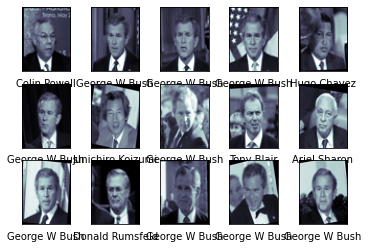

In [35]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [36]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10],
              'svc__gamma': [0.0001, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 3min 2s, sys: 5min 56s, total: 8min 59s
Wall time: 37.3 s
{'svc__C': 10, 'svc__gamma': 0.005}


In [38]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

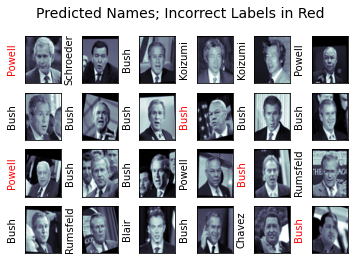

In [39]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.91      0.67      0.77        15
     Colin Powell       0.84      0.85      0.85        68
  Donald Rumsfeld       0.72      0.58      0.64        31
    George W Bush       0.76      0.92      0.83       126
Gerhard Schroeder       0.75      0.65      0.70        23
      Hugo Chavez       1.00      0.45      0.62        20
Junichiro Koizumi       0.91      0.83      0.87        12
       Tony Blair       0.79      0.74      0.77        42

         accuracy                           0.79       337
        macro avg       0.84      0.71      0.76       337
     weighted avg       0.80      0.79      0.79       337



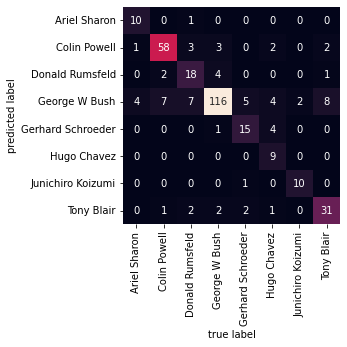

In [41]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### SVM - Pros and Cons

Advantages:
- Efficient with very compact models
- Fast prediction phase
- Works with high dimensional datasets (method of choice for computer vision tasks before CNN)
- Works with different data types with the kernel methods

Disadvantages:
- The scaling with the number of samples $N$ is $\mathcal{O}[N^3]$ at worst, or $\mathcal{O}[N^2]$ for efficient implementations. 
- The results are sensitive to the softening parameter $C$, which is expensive to tune for large data sets.